# Shopee Product Classification 

Notebook to explore and pre-process the product image dataset obtained from the Shopee web scraper.

* From the crawler, we obtained ~3000 images from each of the 27 categories. 
* We exclude 3 miscellaneous categories: 'ShopeePay-Near-Me', 'Miscellaneous', 'Dining-Travel-Services', thus 24 categories remain.

### Data Exploration
* Number of images sampled per category
* Image similarity within categories
* Image similarity across categories


### Data Pre-processing
* Remove duplicates
* Sample each category equally
* Data normalization
* Background Removal
* Text Removal

## Imports and Config

In [1]:
!pip install scikit-image
#!pip install shopee_crawler
!pip install torchvision
!pip install opencv-python
!pip install torchtext --user
!pip install --quiet --pre torchvision --user
!pip install imagehash

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-1.12.1-cp39-cp39-win_amd64.whl (161.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.0 requires torch==1.13.0, but you have torch 1.12.1 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable


In [1]:
# System
import importlib

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import ipywidgets as widgets
import imagehash
from PIL import Image
import pandas as pd
import cv2


## Import Image Dataset

In [4]:
from model.text import dataset
from model.dataset import all_categories
from scripts.crawler import product_category_and_names

_, product_names = product_category_and_names('data')

data = dataset.DataSet(product_names, max_num_img=6000, categories=all_categories)

In [3]:
image_dir = 'data/images/'

In [56]:
data.load_all()

100%|██████████| 200/200 [00:00<00:00, 218.94it/s]


In [57]:
len(data.labels)

4800

In [60]:
img_labels = list(data.labels.values())
img_files = list(data.labels)

# Data Exploration
## Category labels and number of images
Generally around 3000 images for each of the 24 categories

<BarContainer object of 24 artists>

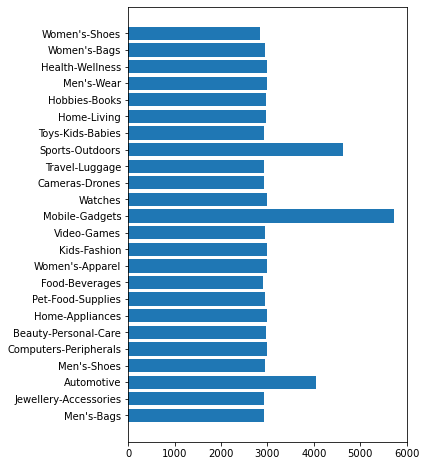

In [58]:
cats, items = zip(*data.image_count_per_category().items())
fig, ax = plt.subplots(figsize=(5, 8))
ax.barh(cats, items)

## Explore image samples in each category

In [59]:
all_categories = data.categories
widgets.interact_manual.opts['manual_name'] = 'Show samples'
im = widgets.interact_manual(lambda category: data.plot_samples(category), category=all_categories)

interactive(children=(Dropdown(description='category', options=("Men's-Bags", 'Jewellery-Accessories', 'Automo…

## Repeated images

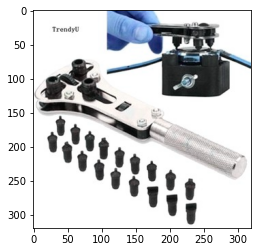

In [63]:
img = cv2.imread(image_dir + '/Watches-cat\\2494323104.png')
plt.imshow(img)

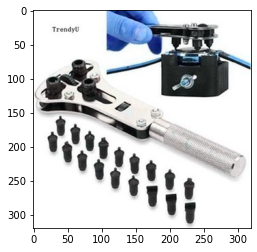

In [64]:
img2 = cv2.imread(image_dir + '/Watches-cat\\2494323109.png')
plt.imshow(img2)

## Image similarity of consecutive images within category

In [ ]:
data = dataset.DataSet(product_names, max_num_img=3000, categories=all_categories)

In [66]:
temp_columns = ['img_file', 'img_label', 'img_hash', 'prev_file','prev_label', 'prev_hash', 'diff']
img_hash_df = pd.DataFrame(columns = temp_columns)

,img_file,img_label,img_hash,prev_file,prev_label,prev_hash,diff


In [67]:
for i in range(len(img_labels)):
    file = img_files[i]
    label = img_labels[i]
    curr_hash =imagehash.average_hash(Image.open(file))
    

    if (i == 0 | prev_label != label):
        prev_file = file
        prev_hash = curr_hash
        prev_label = label
        diff = -1
        
    else:
        #calculate the difference in image hash between current image and previous image
        diff = prev_hash - curr_hash
    
    img_hash_df.loc[len(img_hash_df)] = [file, label, curr_hash, prev_file, prev_label, prev_hash, diff]

    prev_hash = curr_hash
    prev_file = file
    prev_label = label

img_hash_df

,img_file,img_label,img_hash,prev_file,prev_label,prev_hash,diff
0,data/images\Men's-Bags-cat\10000470611.png,0,fbe1c0000183470f,data/images\Men's-Bags-cat\10000470611.png,0,fbe1c0000183470f,-1
1,data/images\Men's-Bags-cat\10005722417.png,0,ffdf9110110001ff,data/images\Men's-Bags-cat\10000470611.png,0,fbe1c0000183470f,21
2,data/images\Men's-Bags-cat\10013979365.png,0,ffef8f8103c180f3,data/images\Men's-Bags-cat\10005722417.png,0,ffdf9110110001ff,18
3,data/images\Men's-Bags-cat\10022976986.png,0,ffff0000000000ff,data/images\Men's-Bags-cat\10013979365.png,0,ffef8f8103c180f3,16
4,data/images\Men's-Bags-cat\10026709904.png,0,fff0f3838344a4fc,data/images\Men's-Bags-cat\10022976986.png,0,ffff0000000000ff,23
...,...,...,...,...,...,...,...
4795,data/images\Women's-Shoes-cat\1212509371.png,23,c39f1f0f33393800,data/images\Women's-Shoes-cat\12101669285.png,23,fff78311c1c18101,31
4796,data/images\Women's-Shoes-cat\12137477152.png,23,ffffff0b0081fdff,data/images\Women's-Shoes-cat\1212509371.png,23,c39f1f0f33393800,30
4797,data/images\Women's-Shoes-cat\1214944213.png,23,f70093ff800091ff,data/images\Women's-Shoes-cat\12137477152.png,23,ffffff0b0081fdff,25
4798,data/images\Women's-Shoes-cat\1220771118.png,23,0307072797cf7f07,data/images\Women's-Shoes-cat\1214944213.png,23,f70093ff800091ff,36


In [70]:
img_hash_df.describe()

,img_label,prev_label,diff
count,4800.000000,4800.000000,4800.000000
mean,11.500000,11.495208,28.535417
std,6.922908,6.922906,8.102978
min,0.000000,0.000000,-1.000000
25%,5.750000,5.000000,24.000000
50%,11.500000,11.000000,29.000000
75%,17.250000,17.000000,34.000000
max,23.000000,23.000000,58.000000


In [74]:
data.cat_reverse_map = dict([(value, key) for key, value in data.cat_map.items()])
img_hash_df['img_label_name'] = img_hash_df['img_label'].map(data.cat_reverse_map)
labelhashdiff = img_hash_df.groupby(['img_label_name'])['diff'].mean().sort_values()
labelhashdiff

img_label_name
Men's-Bags               25.475
Food-Beverages           26.195
Video-Games              26.595
Cameras-Drones           26.740
Computers-Peripherals    27.050
Hobbies-Books            27.785
Health-Wellness          27.845
Home-Appliances          28.195
Men's-Wear               28.335
Sports-Outdoors          28.350
Beauty-Personal-Care     28.425
Women's-Shoes            28.890
Men's-Shoes              28.975
Women's-Bags             29.025
Kids-Fashion             29.125
Watches                  29.305
Mobile-Gadgets           29.330
Automotive               29.390
Travel-Luggage           29.445
Toys-Kids-Babies         29.540
Pet-Food-Supplies        29.700
Jewellery-Accessories    30.265
Home-Living              30.280
Women's-Apparel          30.590
Name: diff, dtype: float64

The top 5 categories with highest image similarity for consecutive images in the dataset are:
* Men's-Bags
* Food-Beverages
* Video-Games
* Cameras-Drones
* Computers-Peripherals

The categories with lowest image similarity for consecutive images in the dataset are:
* Women's-Apparel
* Home-Living
* Jewellery-Accessories
* Pet-Food-Supplies
* Toys-Kids-Babies

Categories with low image similarity within a category may present challenges when training the model to predict the product category.

## Image similarity within and across categories

In [75]:
temp_columns = ['label1', 'label2', 'hash1', 'avg_diff']
img_diff_df = pd.DataFrame(columns = temp_columns)
img_diff_df

,label1,label2,hash1,hash2,diff


In [ ]:
i=0
j=0
for index1, row in img_hash_df.iterrows():
    label1 = row['img_label']
    curr_hash = row['img_hash']
    curr_diff = 0
    j = 0
    prev_label = label1
    for index2, row in img_hash_df.iterrows():

        label2 = row['img_label']
        hash2 = row['img_hash']
        
        if prev_label == label2 & index1 != index2:
            #keep accumulating the differences in imagehash for other images with the same category label
            curr_diff += curr_hash-hash2
            j += 1

        else: 
            #change in label, get the average of differences for the previous category label
            avg_diff = curr_diff / j
            #append 
            img_diff_df.loc[len(img_diff_df)] = [label1, prev_label, curr_hash, avg_diff]
            #reset j and curr_diff
            j = 0
            curr_diff = curr_hash-hash2
        prev_label = label2
    #last image in last category
    j += 1
    avg_diff = curr_diff / j
    img_diff_df.loc[len(img_diff_df)] = [label1, label2, curr_hash, avg_diff]


In [ ]:
img_diff_df['label1_name'] = img_diff_df['label1'].map(data.cat_reverse_map)
img_diff_df['label2_name'] = img_diff_df['label2'].map(data.cat_reverse_map)

img_diff_df

In [ ]:
img_diff_df.describe()

In [ ]:
import numpy as np
img_diff_df['same_label'] = np.where(img_diff_df['label1'] == img_diff_df['label2'], 1, 0)

### Image similarity within the same category
Categories which have high image similarity within its category are more likely to be have a better fit during training to produce a model which can better predict the correct product category.

In [ ]:
same_label_df  = img_diff_df[img_diff_df['same_label']==1]
samelabelhashdiff = same_label_df.groupby(['label1_name'])['avg_diff'].mean()


In [ ]:
same_label_df.head()

In [ ]:
samelabelhashdiff.sort_values()

### Image similarity for each category with other categories

Categories which have high image similarity with other categories may have more likely mix-up in the predicted product category.

In [ ]:
diff_label_df  = img_diff_df[img_diff_df['same_label']==0]
difflabelhashdiff = diff_label_df.groupby(['label1_name','label2_name'])['avg_diff'].mean()
difflabelhashdiff = difflabelhashdiff.reset_index()
difflabelhashdiff.sort_values(by = 'avg_diff', ascending = False)

In [49]:
labelallhashdiff = difflabelhashdiff.groupby(['label1_name'])['avg_diff'].mean()
labelallhashdiff.sort_values()

label1_name
Home-Living              28.247826
Hobbies-Books            28.356522
Toys-Kids-Babies         28.365217
Women's-Apparel          28.373913
Watches                  28.408696
Kids-Fashion             28.421739
Video-Games              28.439130
Food-Beverages           28.465217
Men's-Wear               28.469565
Cameras-Drones           28.486957
Mobile-Gadgets           28.491304
Jewellery-Accessories    28.508696
Men's-Shoes              28.530435
Women's-Bags             28.534783
Home-Appliances          28.547826
Beauty-Personal-Care     28.552174
Automotive               28.560870
Travel-Luggage           28.565217
Pet-Food-Supplies        28.569565
Health-Wellness          28.578261
Men's-Bags               28.604348
Computers-Peripherals    28.608696
Women's-Shoes            28.639130
Sports-Outdoors          28.673913
Name: diff, dtype: float64

We select the following categories for their relatively low image similarity with each other, thus preventing model confusion:
* Women's-Bags
* Men's-Shoes
* Kids-Fashion
* Food-Beverages
* Watches
* Video-Games
* Cameras-Drones
* Home-Appliances
* Hobbies-Books

# Data Pre-Processing

In [ ]:
from scripts.image_clean import get_duplicate_images, remove_background

In [ ]:
dir = 'data\images'
out_dir = 'data\seleected-images'

## Remove duplicates
We remove the duplicates to prevent information leakage from train dataset to validation or test dataset. 

## Sample each category equally

In [ ]:
num_img_to_use = 500

In [ ]:
data = dataset.DataSet(product_names, max_num_img= num_img_to_use, categories=all_categories)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

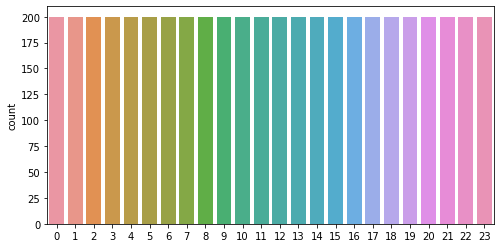

In [61]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(img_labels)

## Data Normalization
--> not sure if this is done later on during import?

## Background Removal
We remove the background of the images to reduce the impact of noise on the training of our model.

## Text Removal
We remove the text in the images as these may be brand names or generic text such as 'Sale' which may occur across categories.

# Conclusion for Data Exploration and Pre-Processing

### Data Exploration:
* Number of images sampled per category
* Image Size
* Image similarity within categories
* Image similarity across categories

### Data Pre-processing:
* Remove duplicates
* Sample each category equally
* Data Normalization - resize images to 224 by 224, normalize pixel values
* Background Removal
* Text Removal
* Data Augmentation for train dataset will be done in the train dataloader.